In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
print(len(df))
df.tail()

144


,Month,AirPassengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [4]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [5]:
df[df.columns[0]] = pd.DatetimeIndex(df[df.columns[0]])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [6]:
#prophet imposes the strict condition that the input columns be named ds(the time column)
#and y(the metric column), so let's rename them accordingly.

df = df.rename(columns={'Month': 'ds',
                       'AirPassengers': 'y'})

df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


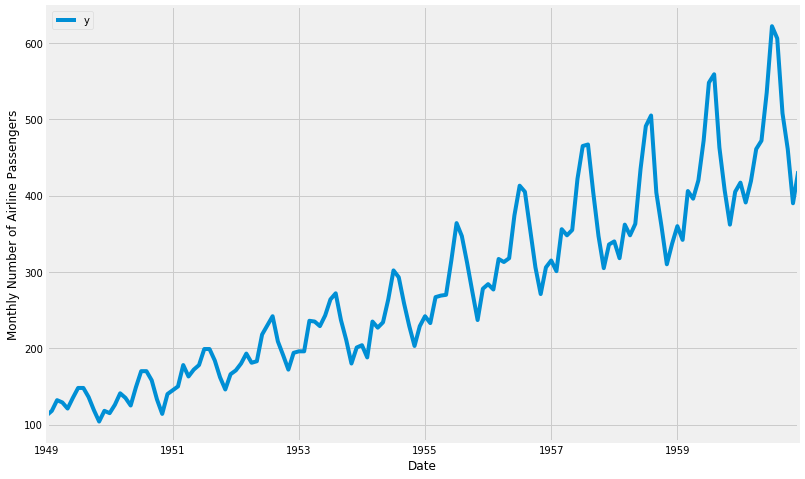

In [7]:
#visualization
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [8]:
#prophet library modeling
my_model = Prophet(interval_width=0.95) #uncertainty interval - default = 80%

In [9]:
my_model.fit(df)

/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions. Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function:

In [10]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


When working with Prophet, it is important to consider the frequency of our time series. Because we are working with monthly data, we clearly specified the desired frequency of the timestamps (in this case, MS is the start of the month). Therefore, the make_future_dataframe generated 36 monthly timestamps for us. In other words, we are looking to predict future values of our time series 3 years into the future.

In [11]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.787427,607.593705,693.777740
176,1963-09-01,602.260711,558.523962,646.028944
177,1963-10-01,566.233600,521.758357,608.765354
178,1963-11-01,534.258296,490.948639,579.666154
179,1963-12-01,563.846779,520.696052,608.716089


In [12]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.390966,37.329138,129.814605,106.390966,106.390966,-21.935305,-21.935305,-21.935305,-21.935305,-21.935305,-21.935305,0.0,0.0,0.0,84.455661
1,1949-02-01,108.569855,33.592182,119.439682,108.569855,108.569855,-30.703975,-30.703975,-30.703975,-30.703975,-30.703975,-30.703975,0.0,0.0,0.0,77.865881
2,1949-03-01,110.537884,69.029076,153.164676,110.537884,110.537884,-0.486998,-0.486998,-0.486998,-0.486998,-0.486998,-0.486998,0.0,0.0,0.0,110.050887
3,1949-04-01,112.716774,64.979464,150.467409,112.716774,112.716774,-5.184948,-5.184948,-5.184948,-5.184948,-5.184948,-5.184948,0.0,0.0,0.0,107.531826
4,1949-05-01,114.825377,64.405071,154.180740,114.825377,114.825377,-3.782347,-3.782347,-3.782347,-3.782347,-3.782347,-3.782347,0.0,0.0,0.0,111.043030


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

ds: the datestamp of the forecasted value
yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
yhat_lower: the lower bound of our forecasts
yhat_upper: the upper bound of our forecasts

A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

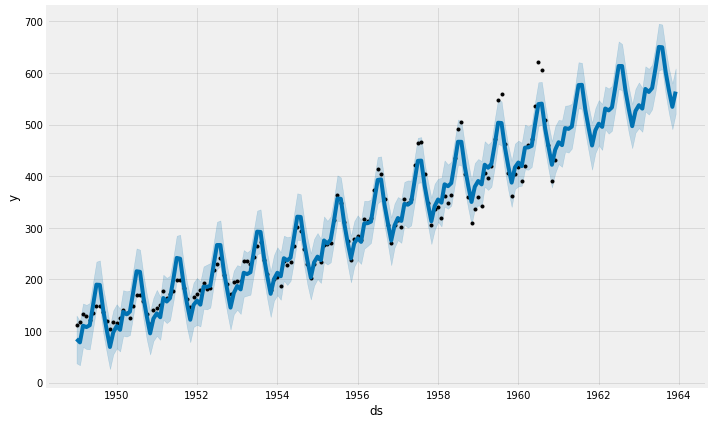

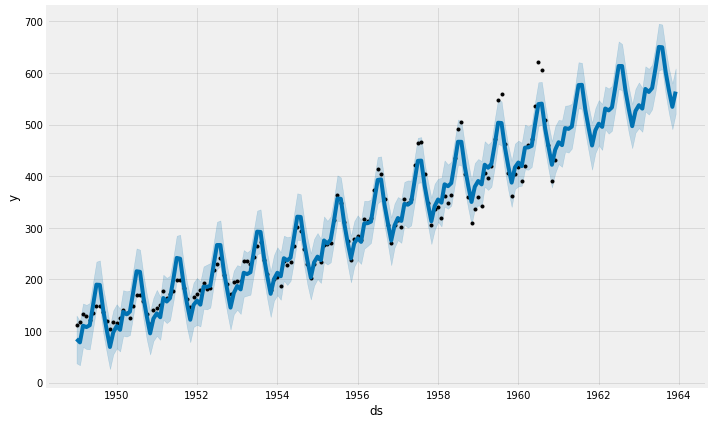

In [13]:
my_model.plot(forecast,
              uncertainty=True)

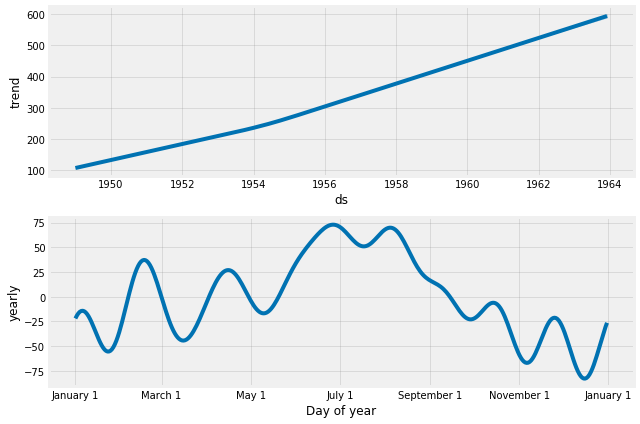

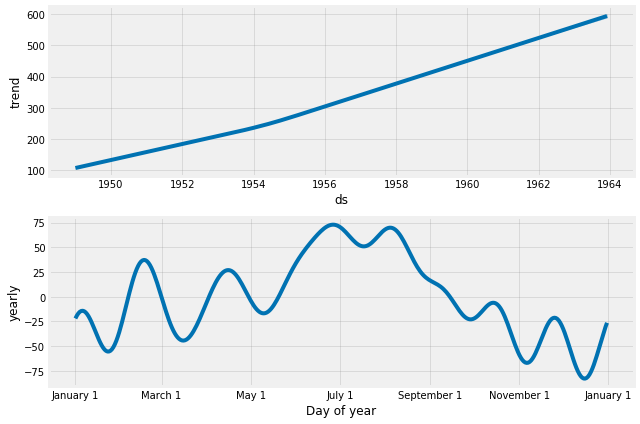

In [14]:
my_model.plot_components(forecast)

In [21]:
import datetime

In [37]:
#auto function
#input : 1) dataset (csv format), 2) number of steps to be predicted, 3) uncertainty interval level (from 0 - 1)
# cuts 80% as training, 20% for test

def prophet_predict(data_set, pred_steps, uncertainty_level):
    data = pd.read_csv(data_set)
    data[data.columns[0]] = pd.DatetimeIndex(data[data.columns[0]])
    data = data.rename(columns={data.columns[0]:'ds', data.columns[1]:'y'})
    
    #For time Later:
    # check if the input of the timeline is by hour, day, week, year, etc.
    i=data[data.columns[0]][1]-data[data.columns[0]][0]
    #double makesure
    j=data[data.columns[0]][2]-data[data.columns[0]][1]
    if (i == datetime.timedelta(minutes=60) and j == datetime.timedelta(minutes=60)):
        t = 'H' #'hour'
    if (i == datetime.timedelta(minutes=60*24) and j == datetime.timedelta(minutes=60*24)):
        t = 'D' #'day'
    if ((i >= datetime.timedelta(minutes=60*24*28) and i <= datetime.timedelta(minutes=60*24*31))
        and (j >= datetime.timedelta(minutes=60*24*28) and j <= datetime.timedelta(minutes=60*24*31))):
        t = 'M' #'monthly' average
    if ((i >= datetime.timedelta(minutes=60*24*365) and i <= datetime.timedelta(minutes=60*24*366))
       and (j >= datetime.timedelta(minutes=60*24*365) and j <= datetime.timedelta(minutes=60*24*366))):
        t = 'Y' # yearly hours
        
    my_model = Prophet(interval_width=uncertainty_level) #uncertainty interval - default = 80%
    my_model.fit(data)
    future_dates = my_model.make_future_dataframe(periods=pred_steps, freq=t)
    forecast = my_model.predict(future_dates)
    my_model.plot(forecast, uncertainty = True)
    print(forecast[['ds', 'yhat']].tail(pred_steps))

In [38]:
df1 = pd.read_csv("AirPassengers.csv")
df2 = pd.read_csv("hourly_volume.csv")

/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds        yhat
144 1960-12-31  462.220785
145 1961-01-31  454.909776
146 1961-02-28  497.890365
147 1961-03-31  487.900057
148 1961-04-30  498.542066
149 1961-05-31  534.258140
150 1961-06-30  577.292609
151 1961-07-31  575.717059
152 1961-08-31  529.246453
153 1961-09-30  492.491197
154 1961-10-31  462.403311
155 1961-11-30  491.992819
156 1961-12-31  497.969308
157 1962-01-31  490.393388
158 1962-02-28  535.785045
159 1962-03-31  523.699274
160 1962-04-30  535.916894
161 1962-05-31  570.302271
162 1962-06-30  614.168521
163 1962-07-31  612.094864
164 1962-08-31  566.180752
165 1962-09-30  529.079974
166 1962-10-31  499.943441
167 1962-11-30  529.447832
168 1962-12-31  533.687414
169 1963-01-31  525.906725
170 1963-02-28  573.674083
171 1963-03-31  559.498880
172 1963-04-30  573.297480
173 1963-05-31  606.340101
174 1963-06-30  651.031406
175 1963-07-31  648.461391
176 1963-08-31  603.122491
177 1963-09-30  565.688294
178 1963-10-31  537.506299
179 1963-11-30  566.868656


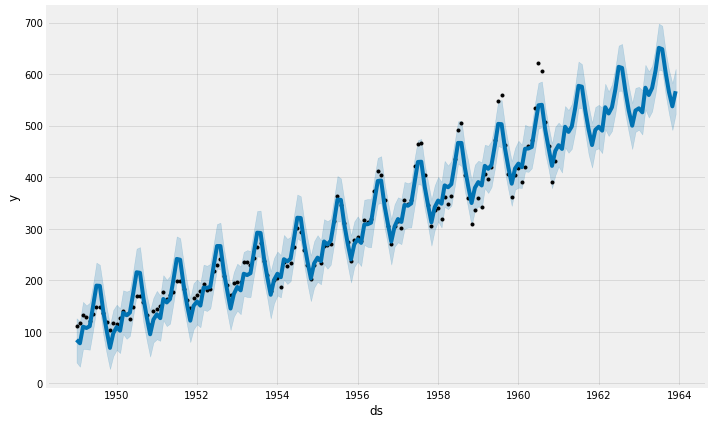

In [39]:
prophet_predict("AirPassengers.csv", 36, 0.95)

/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                      ds         yhat
1200 2016-08-23 00:00:00    20.126056
1201 2016-08-23 01:00:00   109.781161
1202 2016-08-23 02:00:00   139.419504
1203 2016-08-23 03:00:00   112.980987
1204 2016-08-23 04:00:00    82.482295
1205 2016-08-23 05:00:00    73.814222
1206 2016-08-23 06:00:00    74.487162
1207 2016-08-23 07:00:00    83.605631
1208 2016-08-23 08:00:00   148.676111
1209 2016-08-23 09:00:00   329.196992
1210 2016-08-23 10:00:00   616.106645
1211 2016-08-23 11:00:00   900.012235
1212 2016-08-23 12:00:00  1043.864886
1213 2016-08-23 13:00:00  1007.772527
1214 2016-08-23 14:00:00   905.225372
1215 2016-08-23 15:00:00   919.633495
1216 2016-08-23 16:00:00  1139.909034
1217 2016-08-23 17:00:00  1460.455179
1218 2016-08-23 18:00:00  1644.824617
1219 2016-08-23 19:00:00  1508.935107
1220 2016-08-23 20:00:00  1070.256080
1221 2016-08-23 21:00:00   536.739660
1222 2016-08-23 22:00:00   149.200118
1223 2016-08-23 23:00:00    14.536239
1224 2016-08-24 00:00:00    63.773011
1225 2016-08

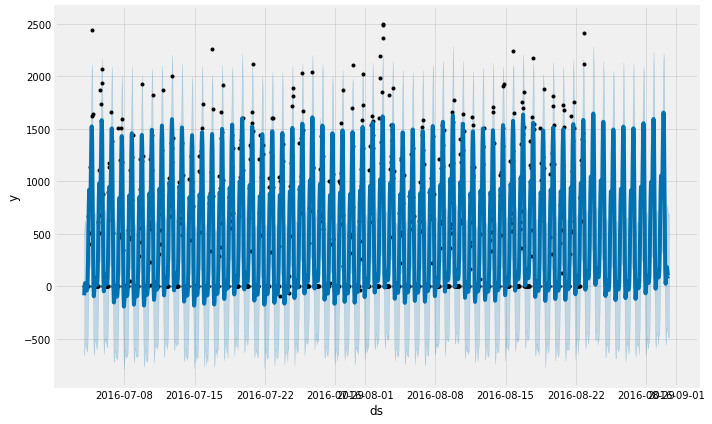

In [40]:
prophet_predict("hourly_volume.csv", 200, 0.95)